In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Reading the data

In [98]:
df = pd.read_csv('winequality-white.csv', delimiter=';')

In [99]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Initial visual analysis

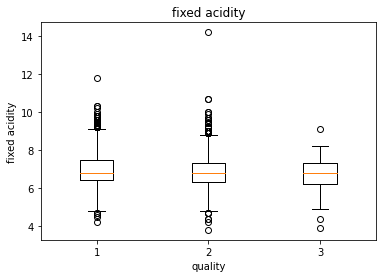

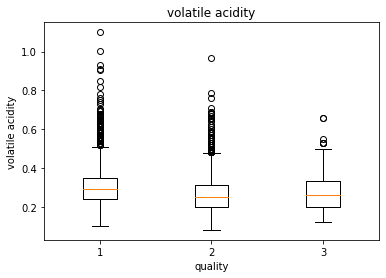

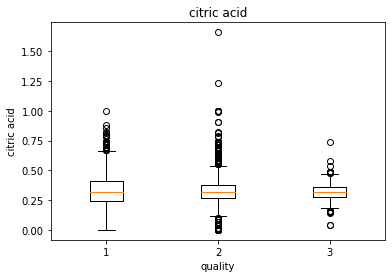

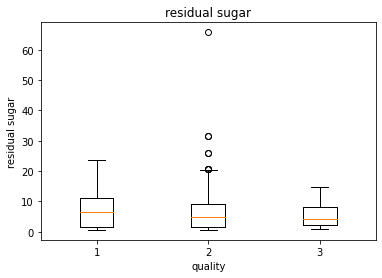

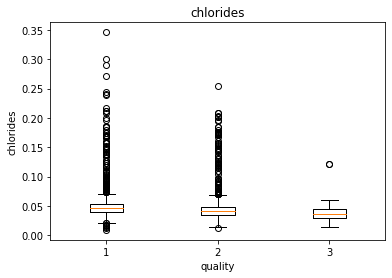

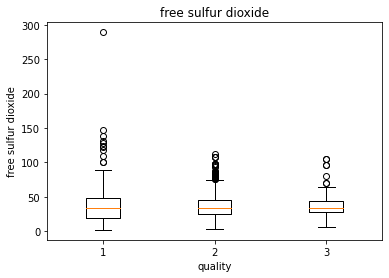

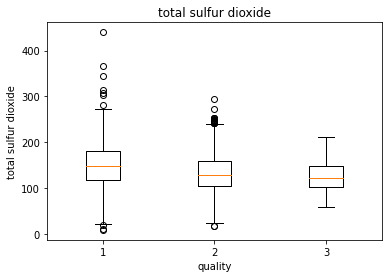

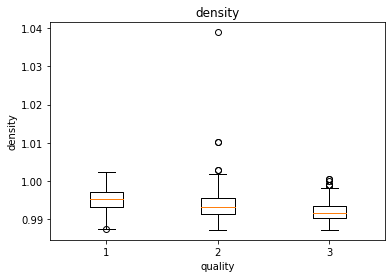

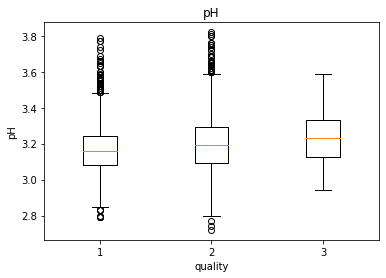

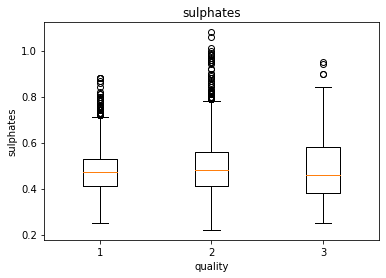

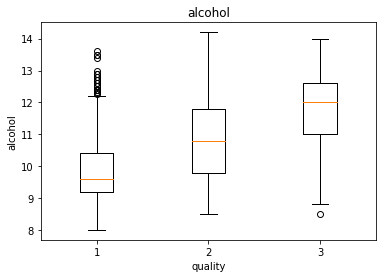

In [103]:
for label in df.columns[:-1]:
# for label in ['alcohol']:
    plt.boxplot([df[df['quality']==i][label] for i in range(0, 3)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'white'.join(label.split(' ')))
    plt.show()

# Gathering the training and testing data

In [101]:
# Since the numbers 3-9 don't really mean much, lets map these to low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [107]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [83]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [84]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


# K Nearest Neighbors Classifier

In [117]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [118]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


# Random Forest Classifier

In [120]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       321
           1       0.84      0.90      0.86       624
           2       1.00      0.43      0.60        35

    accuracy                           0.82       980
   macro avg       0.87      0.68      0.74       980
weighted avg       0.82      0.82      0.82       980

0.8049989561041807


# Decision Tree Classifier

In [121]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       321
           1       0.80      0.79      0.79       624
           2       0.38      0.49      0.42        35

    accuracy                           0.73       980
   macro avg       0.61      0.64      0.62       980
weighted avg       0.74      0.73      0.73       980

0.7363504097291091


# Stochastic Gradient Descent

In [122]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.59      0.47      0.53       321
           1       0.72      0.83      0.77       624
           2       0.00      0.00      0.00        35

    accuracy                           0.68       980
   macro avg       0.44      0.44      0.43       980
weighted avg       0.65      0.68      0.66       980

0.7023931311655097


# Trying to improve results

In [90]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.7s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   3.3s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   3.2s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_sa

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=98, bootstrap=False, total=   6.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   6.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   6.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   6.8s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True 
[CV]  n_estimat

[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   8.1s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   8.5s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   6.8s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.4s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, mi

[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.5s
[CV] n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.5s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.4s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.4s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_s

[CV]  n_estimators=788, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=54, bootstrap=True, total=   4.5s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   2.9s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   2.8s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   2.9s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_sam

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   7.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   7.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   7.9s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False, total=   2.8s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366,

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.4s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.4s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.4s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.4s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_

[CV]  n_estimators=261, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=32, bootstrap=True, total=   1.6s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   5.6s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   5.4s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   7.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimators=1000, min_samp

[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   4.9s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   6.4s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   5.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False, total=   7.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, mi

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 18.8min finished


              precision    recall  f1-score   support

           0       0.77      0.71      0.74       321
           1       0.83      0.89      0.86       624
           2       1.00      0.40      0.57        35

    accuracy                           0.81       980
   macro avg       0.87      0.67      0.72       980
weighted avg       0.82      0.81      0.81       980



In [110]:
print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       321
           1       0.83      0.89      0.86       624
           2       1.00      0.40      0.57        35

    accuracy                           0.81       980
   macro avg       0.87      0.67      0.72       980
weighted avg       0.82      0.81      0.81       980

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [111]:
rfeval = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
rfeval.mean()


0.8065328305235138

In [123]:
rf_optimized = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=None, bootstrap=True)
rf_optimized.fit(x_train, y_train)

rfeval = cross_val_score(estimator=rf_optimized, X=x_train, y=y_train, cv=10)
rfeval.mean()


0.8001487551542356